In [1]:
import pandas as pd
df = pd.read_csv('D:\Rashika\Decision analytics in business/business2020.csv',encoding= "ISO-8859-1",low_memory = False)
df.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,attributes.AgesAllowed,attributes.RestaurantsCounterService,attributes.Open24Hours,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday
0,1,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,...,NaN,NaN,NaN,10:0-18:0,11:0-20:0,10:0-18:0,11:0-20:0,11:0-20:0,11:0-20:0,13:0-18:0
1,2,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,...,NaN,NaN,NaN,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,NaN,NaN
4,5,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726649,4.5,...,NaN,NaN,NaN,0:0-0:0,9:0-16:0,9:0-16:0,9:0-16:0,9:0-16:0,NaN,NaN


# Exploring Yelp data: 

In [2]:
import numpy as np
from scipy import sparse
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [3]:
df['Sectors']=  np.where(df['categories'].str.contains('Hotels & Travel|Bars|Lounges|Nightlife'),'Hotel', 
                         np.where(df['categories'].str.contains('Food|Tea & Coffee|Restaurants'),'Food',
                                np.where(df['categories'].str.contains('Beauty|Spas|Hair|Salons'),'Beauty',
                                         np.where(df['categories'].str.contains('Active Life|Gyms'),'Fitness', 
                                                    np.where(df['categories'].str.contains('Real|Estate'),'Real Estate',
                                                             np.where(df['categories'].str.contains('Clothing|Fashion'),'Clothing',
                                                                      np.where(df['categories'].str.contains('Health & Medical|Medicines'),'Health',  
                                                                               np.where(df['categories'].str.contains('Automotive|Auto Repair'),'Automobile',
                                                                                        np.where(df['categories'].str.contains('Arts & Entertainment|Event Planning & Services'),'Entertainment',
                                                                                                 np.where(df['categories'].str.contains('Local Services|Home Services|Contractors'),'Utilities services',
                                                                                                          np.where(df['categories'].str.contains('Pet Services|Pet'),'Pet care',
                                                                                                                   np.where(df['categories'].str.contains('Mass Media|Television Stations|Video/Film'),'Media',
                                                                                                                            np.where(df['categories'].str.contains('Financial Services|Investing'),'Finance',
                                                                                                                                     np.where(df['categories'].str.contains('Churches|Religious'),'Religious',
                                                                                                                                              np.where(df['categories'].str.contains('Lawyers|Law'),'Law',
                                                                                                                                                       np.where(df['categories'].str.contains('Education|Colleges & Universities|Schools'),'Education',
                                                                                                                                                                np.where(df['categories'].str.contains('Public Services & Government|Legal Services|Professional Services'),'Service',
                                                                                                                                                                         np.where(df['categories'].str.contains('Shopping|Shops'),'Retail','Others',))))))))))))))))))
                                                                                                                                     
                                                                                                                                               
                                                                                                                                     
                                                                                                                                     
                                                                                                                                  
                                                                                                                            
                                                                                                          
                                                                                                          
                                                                                                          
                                                                                       
                                                                              
                                                  
                                             
                                

In [4]:
import matplotlib.pyplot as plt
df[['categories','Sectors']].head(60)

,categories,Sectors
0,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Fitness
1,"Health & Medical, Fitness & Instruction, Yoga,...",Fitness
2,"Pets, Pet Services, Pet Groomers",Pet care
3,"Hardware Stores, Home Services, Building Suppl...",Utilities services
4,"Home Services, Plumbing, Electricians, Handyma...",Utilities services
5,"Auto Repair, Automotive, Oil Change Stations, ...",Automobile
6,"Dry Cleaning & Laundry, Local Services, Laundr...",Utilities services
7,"Auto Repair, Oil Change Stations, Automotive, ...",Automobile
8,"Ethnic Food, Food Trucks, Specialty Food, Impo...",Food
9,"Martial Arts, Gyms, Fitness & Instruction, Act...",Fitness


Text(0.5, 1.0, 'Highest to lowest business sectors')

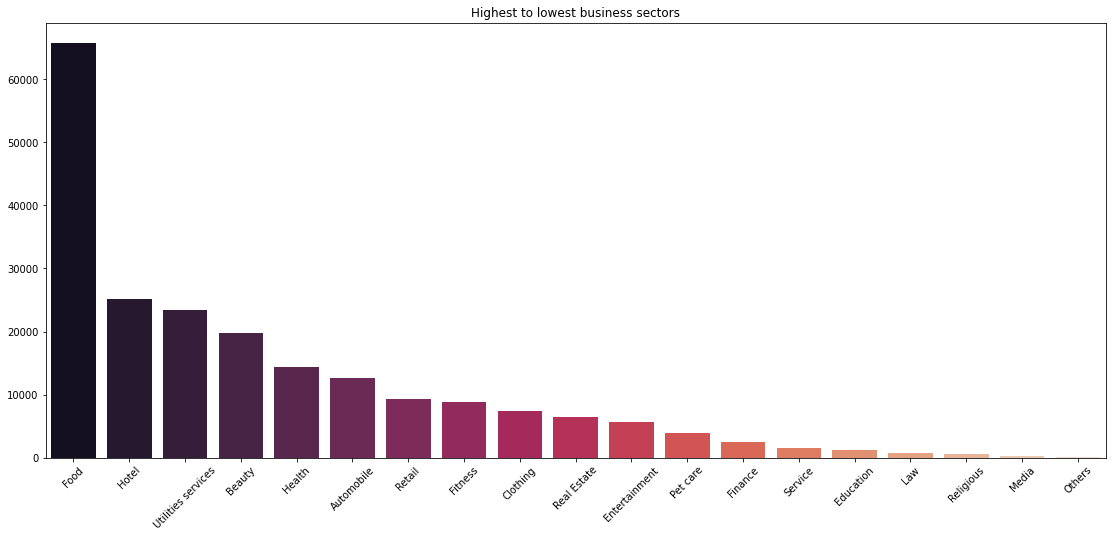

In [5]:
import seaborn as sns 
plt.figure(figsize=(19,8))
sns.barplot(x=df.Sectors.value_counts().head(20).index,y=df.Sectors.value_counts().head(20).values,palette ='rocket')
plt.xticks(rotation=45)
plt.title('Highest to lowest business sectors')

# Highest number of data is in Food sector and lowest in media sector.

In [6]:
df.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,attributes.RestaurantsCounterService,attributes.Open24Hours,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,Sectors
0,1,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,...,NaN,NaN,10:0-18:0,11:0-20:0,10:0-18:0,11:0-20:0,11:0-20:0,11:0-20:0,13:0-18:0,Fitness
1,2,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fitness
2,3,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pet care
3,4,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,...,NaN,NaN,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,NaN,NaN,Utilities services
4,5,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726649,4.5,...,NaN,NaN,0:0-0:0,9:0-16:0,9:0-16:0,9:0-16:0,9:0-16:0,NaN,NaN,Utilities services


# Let's explore review dataset, merging with business dataset on the basis of business id.

In [7]:
review_df = pd.read_csv('D:\Rashika\Decision analytics in business/review.csv',encoding= "ISO-8859-1",low_memory = False)
review_df.head(50)

,Unnamed: 0,business_id,review_id,user_id,stars.x,useful,funny,cool,text,date
0,87,--7zmmkVg-IMGaXbuVd0SQ,ifkE_LYzzHgHSykE7rjX9Q,xL0YWGehJjl--2EgQZlDrA,2,1,1,1,Great location and property. It stops there th...,2018-05-26 21:19:31
1,88,--7zmmkVg-IMGaXbuVd0SQ,pUrCSWydxHsNYV86bKP1ig,CLWqsuY7k7oA4gDoCglasw,5,2,0,0,"Beyond excellent beer. Jay, working the bar, ...",2016-08-18 02:58:42
2,89,--7zmmkVg-IMGaXbuVd0SQ,Ui4WW3vpYS-fJCxXEQ8vbA,FRvKvr1-AsUaCBuxaoxnCg,4,1,1,1,Definitely can't wait to return once the weath...,2016-01-10 13:26:01
3,90,--7zmmkVg-IMGaXbuVd0SQ,PeDxGtm1nYfwyCqgZgepYg,udTNSkWRLJjkATrWPdITvQ,5,2,2,2,The hubby and I stopped in for a quick beer be...,2018-01-01 02:09:40
4,91,--7zmmkVg-IMGaXbuVd0SQ,ho-J0dYObVp8E6r6yYGwYg,widfFsbPZyg7-YzPSMufBg,1,1,0,0,Update 3/5/18\r\nI'm so fed up with place. Th...,2018-03-04 03:24:43
5,92,--7zmmkVg-IMGaXbuVd0SQ,meOTgx8Vl6bVOYGvRD4wzw,SBi0TYUSIrct8WSTyK6DFg,2,4,0,1,Extremely mediocre at best. Visited Primal Bre...,2017-07-21 00:17:50
6,93,--7zmmkVg-IMGaXbuVd0SQ,AqABeZEFE5aRV0x3IZw8ug,XQqNG5R6xX-gDnwNFNE20g,5,2,0,1,My husband and I took our friend here and we h...,2015-10-07 14:43:15
7,94,--7zmmkVg-IMGaXbuVd0SQ,_4Ivp9U2j9F7uicJhfrJjA,ePm0UDfRzThVIsIK5gSp1Q,4,6,3,4,Last stop for the day. I love that you have a ...,2016-01-03 17:00:47
8,95,--7zmmkVg-IMGaXbuVd0SQ,YQCXZnBXQ8tDkIiAPdfOKA,Zp22e9nKvoqFcULOrrMveg,4,0,0,0,Strong beers still developing; this is a great...,2014-12-30 16:03:41
9,96,--7zmmkVg-IMGaXbuVd0SQ,Sj9w6Sw1116q6zNfXy79QQ,widfFsbPZyg7-YzPSMufBg,5,0,0,0,This is an awesome place. It's been through so...,2019-05-05 12:38:13


In [8]:
result = pd.merge(review_df, df, how="inner", on=["business_id"])
result.head()

,Unnamed: 0_x,business_id,review_id,user_id,stars.x,useful,funny,cool,text,date,...,attributes.RestaurantsCounterService,attributes.Open24Hours,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,Sectors
0,87,--7zmmkVg-IMGaXbuVd0SQ,ifkE_LYzzHgHSykE7rjX9Q,xL0YWGehJjl--2EgQZlDrA,2,1,1,1,Great location and property. It stops there th...,2018-05-26 21:19:31,...,NaN,NaN,16:0-22:0,16:0-22:0,14:0-22:0,14:0-22:0,12:0-23:0,12:0-23:0,12:0-20:0,Food
1,88,--7zmmkVg-IMGaXbuVd0SQ,pUrCSWydxHsNYV86bKP1ig,CLWqsuY7k7oA4gDoCglasw,5,2,0,0,"Beyond excellent beer. Jay, working the bar, ...",2016-08-18 02:58:42,...,NaN,NaN,16:0-22:0,16:0-22:0,14:0-22:0,14:0-22:0,12:0-23:0,12:0-23:0,12:0-20:0,Food
2,89,--7zmmkVg-IMGaXbuVd0SQ,Ui4WW3vpYS-fJCxXEQ8vbA,FRvKvr1-AsUaCBuxaoxnCg,4,1,1,1,Definitely can't wait to return once the weath...,2016-01-10 13:26:01,...,NaN,NaN,16:0-22:0,16:0-22:0,14:0-22:0,14:0-22:0,12:0-23:0,12:0-23:0,12:0-20:0,Food
3,90,--7zmmkVg-IMGaXbuVd0SQ,PeDxGtm1nYfwyCqgZgepYg,udTNSkWRLJjkATrWPdITvQ,5,2,2,2,The hubby and I stopped in for a quick beer be...,2018-01-01 02:09:40,...,NaN,NaN,16:0-22:0,16:0-22:0,14:0-22:0,14:0-22:0,12:0-23:0,12:0-23:0,12:0-20:0,Food
4,91,--7zmmkVg-IMGaXbuVd0SQ,ho-J0dYObVp8E6r6yYGwYg,widfFsbPZyg7-YzPSMufBg,1,1,0,0,Update 3/5/18\r\nI'm so fed up with place. Th...,2018-03-04 03:24:43,...,NaN,NaN,16:0-22:0,16:0-22:0,14:0-22:0,14:0-22:0,12:0-23:0,12:0-23:0,12:0-20:0,Food


In [9]:
result['Dates'] = pd.to_datetime(result['date']).dt.date
result['Time'] = pd.to_datetime(result['date']).dt.time
result['year'] = pd.DatetimeIndex(result['Dates']).year
result

,Unnamed: 0_x,business_id,review_id,user_id,stars.x,useful,funny,cool,text,date,...,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,Sectors,Dates,Time,year
0,87,--7zmmkVg-IMGaXbuVd0SQ,ifkE_LYzzHgHSykE7rjX9Q,xL0YWGehJjl--2EgQZlDrA,2,1,1,1,Great location and property. It stops there th...,2018-05-26 21:19:31,...,16:0-22:0,14:0-22:0,14:0-22:0,12:0-23:0,12:0-23:0,12:0-20:0,Food,2018-05-26,21:19:31,2018
1,88,--7zmmkVg-IMGaXbuVd0SQ,pUrCSWydxHsNYV86bKP1ig,CLWqsuY7k7oA4gDoCglasw,5,2,0,0,"Beyond excellent beer. Jay, working the bar, ...",2016-08-18 02:58:42,...,16:0-22:0,14:0-22:0,14:0-22:0,12:0-23:0,12:0-23:0,12:0-20:0,Food,2016-08-18,02:58:42,2016
2,89,--7zmmkVg-IMGaXbuVd0SQ,Ui4WW3vpYS-fJCxXEQ8vbA,FRvKvr1-AsUaCBuxaoxnCg,4,1,1,1,Definitely can't wait to return once the weath...,2016-01-10 13:26:01,...,16:0-22:0,14:0-22:0,14:0-22:0,12:0-23:0,12:0-23:0,12:0-20:0,Food,2016-01-10,13:26:01,2016
3,90,--7zmmkVg-IMGaXbuVd0SQ,PeDxGtm1nYfwyCqgZgepYg,udTNSkWRLJjkATrWPdITvQ,5,2,2,2,The hubby and I stopped in for a quick beer be...,2018-01-01 02:09:40,...,16:0-22:0,14:0-22:0,14:0-22:0,12:0-23:0,12:0-23:0,12:0-20:0,Food,2018-01-01,02:09:40,2018
4,91,--7zmmkVg-IMGaXbuVd0SQ,ho-J0dYObVp8E6r6yYGwYg,widfFsbPZyg7-YzPSMufBg,1,1,0,0,Update 3/5/18\r\nI'm so fed up with place. Th...,2018-03-04 03:24:43,...,16:0-22:0,14:0-22:0,14:0-22:0,12:0-23:0,12:0-23:0,12:0-20:0,Food,2018-03-04,03:24:43,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898478,8021114,ZZzS6rgqXZWmq6TBYN6lrw,sBcpf5m0lYYSoRw8RGty5A,VwrOxVFdGtMw8JMK0ethxw,5,0,0,0,Such a fun time! Going to go back. Bar is outs...,2018-10-04 03:05:04,...,14:30-2:30,14:30-2:30,14:30-2:30,11:30-2:30,14:30-2:30,14:30-2:30,Hotel,2018-10-04,03:05:04,2018
898479,8021115,ZZzS6rgqXZWmq6TBYN6lrw,5xNvT1BN2dn-IoLap-InIA,oHvVWVKGmazU59A3xNMGew,4,2,0,2,I went to Deekers as part of a bar crawl. We w...,2012-12-26 20:38:51,...,14:30-2:30,14:30-2:30,14:30-2:30,11:30-2:30,14:30-2:30,14:30-2:30,Hotel,2012-12-26,20:38:51,2012
898480,8021116,ZZzS6rgqXZWmq6TBYN6lrw,erU-7HLWaVBKp39xlEY5kg,IHz_DY4cDDeFnNP1NO6Jfg,5,0,0,0,It's honestly my favorite go to bar. There's a...,2016-01-05 23:20:03,...,14:30-2:30,14:30-2:30,14:30-2:30,11:30-2:30,14:30-2:30,14:30-2:30,Hotel,2016-01-05,23:20:03,2016
898481,8021117,ZZzS6rgqXZWmq6TBYN6lrw,3vAML6pBgC7GkoMEysoEmA,Jvv-uXYsx2lZiIvZw9ff6A,5,1,1,1,"Full bar, relaxed atmosphere, good service, de...",2018-05-05 18:17:59,...,14:30-2:30,14:30-2:30,14:30-2:30,11:30-2:30,14:30-2:30,14:30-2:30,Hotel,2018-05-05,18:17:59,2018


In [10]:
df_na_sum = result.isnull().sum() #For each of those columns, display the number of NA records
df_na_sum[df_na_sum != 0]

name                                          3
address                                    8484
postal_code                                 447
categories                                  336
attributes.BusinessAcceptsCreditCards     61515
attributes.BikeParking                   201624
attributes.GoodForKids                   257063
attributes.BusinessParking               134688
attributes.ByAppointmentOnly             693607
attributes.RestaurantsPriceRange2        139124
attributes.DogsAllowed                   609020
attributes.WiFi                          252193
attributes.RestaurantsAttire             323429
attributes.RestaurantsTakeOut            246839
attributes.NoiseLevel                    314981
attributes.RestaurantsReservations       292424
attributes.RestaurantsGoodForGroups      293628
attributes.HasTV                         291083
attributes.Alcohol                       300338
attributes.RestaurantsDelivery           287458
attributes.OutdoorSeating               

In [11]:
Xy= result[['stars','Sectors']]
temp = Xy.reset_index().groupby(['Sectors', 'stars']).aggregate('count').unstack()['index']
temp.columns.name = None
temp = temp.reset_index()
temp.head(20)

,Sectors,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,Automobile,426.0,920.0,2255.0,3689.0,4181.0,3789.0,3541.0,2961.0,2438.0
1,Beauty,187.0,535.0,1599.0,4259.0,5816.0,8176.0,9968.0,9495.0,4491.0
2,Clothing,301.0,147.0,600.0,1383.0,2019.0,2934.0,2038.0,1423.0,774.0
3,Education,24.0,19.0,25.0,18.0,69.0,174.0,192.0,166.0,131.0
4,Entertainment,123.0,62.0,327.0,388.0,1197.0,1978.0,3608.0,2381.0,1752.0
5,Finance,116.0,75.0,100.0,218.0,151.0,183.0,63.0,50.0,88.0
6,Fitness,97.0,190.0,350.0,822.0,2027.0,2739.0,3336.0,5414.0,2719.0
7,Food,1126.0,6559.0,12319.0,25035.0,48943.0,99651.0,150835.0,86953.0,6971.0
8,Health,284.0,818.0,1099.0,1741.0,1745.0,2039.0,1760.0,1802.0,2170.0
9,Hotel,570.0,2640.0,6865.0,15033.0,37485.0,74350.0,98860.0,36964.0,2042.0


In [12]:
temp=temp.dropna().reset_index(drop=True)
temp.head(20)
temp['mean'] = temp.mean(axis=1)
temp['avg'] = (temp[1.0]*1 + temp[1.5]*1.5 + temp[2.0]*2 + temp[2.5]*2.5 + temp[3.0]*3 + temp[3.5]*3.5 + temp[4.0]*4 + temp[4.5]*4.5 + temp[5.0]*5)/(temp[1.0] + temp[1.5] + temp[2.0] + temp[2.5] + temp[3.0] + temp[3.5] + temp[4.0] + temp[4.5] + temp[5.0])
temp['mean'] = temp['mean'].round(decimals=1)
temp['avg'] = temp['avg'].round(decimals=2)
temp.head(20)

,Sectors,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,mean,avg
0,Automobile,426.0,920.0,2255.0,3689.0,4181.0,3789.0,3541.0,2961.0,2438.0,2688.9,3.35
1,Beauty,187.0,535.0,1599.0,4259.0,5816.0,8176.0,9968.0,9495.0,4491.0,4947.3,3.73
2,Clothing,301.0,147.0,600.0,1383.0,2019.0,2934.0,2038.0,1423.0,774.0,1291.0,3.44
3,Education,24.0,19.0,25.0,18.0,69.0,174.0,192.0,166.0,131.0,90.9,3.83
4,Entertainment,123.0,62.0,327.0,388.0,1197.0,1978.0,3608.0,2381.0,1752.0,1312.9,3.92
5,Finance,116.0,75.0,100.0,218.0,151.0,183.0,63.0,50.0,88.0,116.0,2.86
6,Fitness,97.0,190.0,350.0,822.0,2027.0,2739.0,3336.0,5414.0,2719.0,1966.0,3.96
7,Food,1126.0,6559.0,12319.0,25035.0,48943.0,99651.0,150835.0,86953.0,6971.0,48710.2,3.70
8,Health,284.0,818.0,1099.0,1741.0,1745.0,2039.0,1760.0,1802.0,2170.0,1495.3,3.45
9,Hotel,570.0,2640.0,6865.0,15033.0,37485.0,74350.0,98860.0,36964.0,2042.0,30534.3,3.64


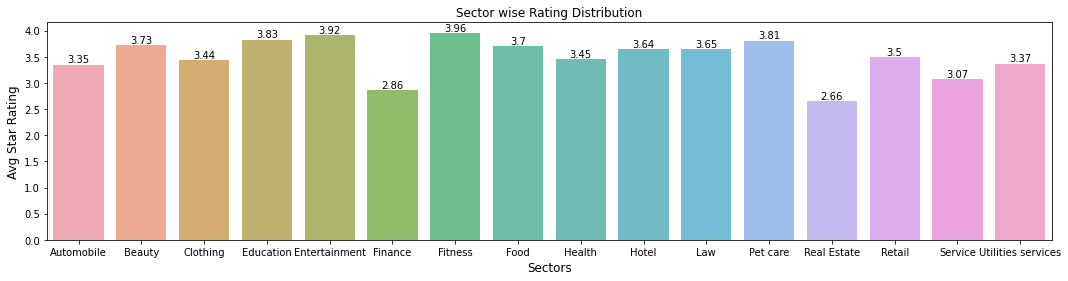

In [13]:
x=temp['Sectors']
#x=x.sort_index()
y = temp['avg']
#plot
plt.figure(figsize=(18,4))
ax= sns.barplot(x, y, alpha=0.8)
plt.title("Sector wise Rating Distribution")
plt.ylabel('Avg Star Rating', fontsize=12)
plt.xlabel('Sectors', fontsize=12)
#adding the text labels
rects = ax.patches
labels = temp['avg']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')

plt.show()

In [22]:
ml_real_estate.head()

,year,Sectors,Unnamed: 0_x,stars.x,useful,funny,cool,Unnamed: 0_y,latitude,longitude,stars,review_count,is_open
0,2007,Real Estate,1.958833e+06,3.666667,3.333333,0.333333,0.333333,93750.333333,39.346407,-81.445880,2.833333,6.333333,1.000000
1,2008,Real Estate,4.842481e+06,3.500000,4.222222,0.500000,0.555556,95537.777778,35.934630,-80.943651,3.277778,11.666667,0.944444
2,2009,Real Estate,4.488898e+06,2.941176,8.588235,2.647059,1.058824,106471.941176,37.028191,-81.095776,2.941176,12.058824,0.941176
3,2010,Real Estate,4.404014e+06,3.434783,8.695652,2.000000,1.673913,97433.456522,36.562017,-81.030586,2.989130,10.413043,0.956522
4,2011,Real Estate,3.892605e+06,3.120968,6.693548,0.895161,0.629032,105798.629032,36.316473,-80.976491,2.745968,32.290323,0.879032


# Highest rating & Lowest rating:
Fitness sector- 3.96
Real estate- 2.66



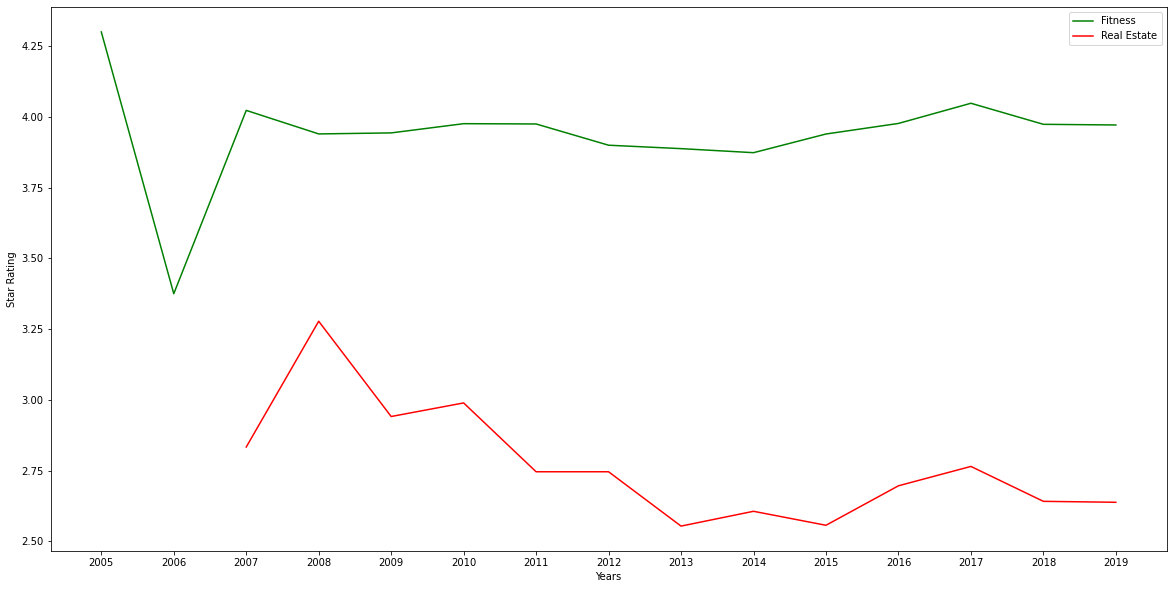

In [24]:
ml_fitness = result.query("Sectors == 'Fitness'").groupby(['year', 'Sectors']).mean('stars').sort_values(by='year')
ml_fitness.head(20)
ml_real_estate = result.query("Sectors == 'Real Estate'").groupby(['year', 'Sectors']).mean('stars').sort_values(by='year')

ml_fitness = ml_fitness.reset_index()
ml_real_estate = ml_real_estate.reset_index()
ml_fitness.head(20)

from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(ml_fitness['year']).astype(str), ml_fitness['stars'], color='green', label="Fitness")
plt.plot(np.asarray(ml_real_estate['year']).astype(str), ml_real_estate['stars'], color='red', label="Real Estate")
# plt.xticks(range(2005,2019))# ax.set_xticklabels(tick_labels.astype(int))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.xlabel("Years")
plt.ylabel("Star Rating")
plt.legend()
plt.show()

Fitness sector- Rating is constant at 4 star since 2006, this means fitness sectors has been trying to maintain thier rating over 4 star. 
Real estate- For real estate, there is a downfall since 2009, and hence it keeps falling since then. 

In [25]:
ml_real_estate = result.query("Sectors == 'Real Estate'").reset_index()
ml_real_estate.head()

,index,Unnamed: 0_x,business_id,review_id,user_id,stars.x,useful,funny,cool,text,...,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,Sectors,Dates,Time,year
0,1477,12587,-2rB3j8WcmuchWp0CIdViQ,3pcHGNI8WHv44fcvgkLrMg,rcv4qve0wrKWxBliq-pkaw,1,4,0,0,"DO NOT,,i repeat do not think of buying or ren...",...,NaN,NaN,NaN,NaN,NaN,NaN,Real Estate,2012-05-28,16:07:44,2012
1,1478,12588,-2rB3j8WcmuchWp0CIdViQ,Qq_Xo8ExRy8ADFTfhLsFMQ,Pl_kd385sDSRffuFgMN7IQ,1,8,1,0,I've had my brand new truck vandalized by a re...,...,NaN,NaN,NaN,NaN,NaN,NaN,Real Estate,2008-07-03,13:27:14,2008
2,1479,12589,-2rB3j8WcmuchWp0CIdViQ,ShGKDEHjro3mTk_vwQrisw,aeWxiuYW9Sym5jzQsIEYmA,1,0,0,0,Do not rent or buy I repeat do not rent or buy...,...,NaN,NaN,NaN,NaN,NaN,NaN,Real Estate,2013-07-12,23:51:45,2013
3,2818,27735,-9sRzV_tC9C6Degpizet2g,IzQUSy6VyICL4xsVoim7bg,wi3P_JxFvsAAe9l_HOGjPA,5,4,2,2,My experience with these guys was 100% positiv...,...,8:30-17:30,8:30-17:30,8:30-17:30,8:30-17:30,NaN,NaN,Real Estate,2018-09-04,21:16:46,2018
4,2819,27736,-9sRzV_tC9C6Degpizet2g,sy_HSYsFNnyyGsPwcvj0aQ,TF9vTpoi3qZW0206JIEDYg,1,3,0,1,This place is shady and a scam. They will not ...,...,8:30-17:30,8:30-17:30,8:30-17:30,8:30-17:30,NaN,NaN,Real Estate,2018-06-26,14:29:34,2018


In [26]:
fitness_df= result[['business_id','user_id','name','stars','Sectors','text','stars.x','date','is_open','review_count','latitude','longitude','useful','funny','cool','year']]
fitness_df=fitness_df[fitness_df['Sectors'].str.contains("Fitness")].reset_index(drop=True)
fitness_df.tail(18)

,business_id,user_id,name,stars,Sectors,text,stars.x,date,is_open,review_count,latitude,longitude,useful,funny,cool,year
17676,ZYP1NFWMVseKGeWk_fzYJg,ox9koLWTaWyZbaEivAv6ZQ,Airport Greens Golf Club,2.5,Fitness,It gets the job done. The buckets are a coupl...,3,2011-08-27 02:28:34,1,10,41.57109,-81.47231,0,0,0,2011
17677,ZYP1NFWMVseKGeWk_fzYJg,NWMul2Rh-VHEkSv6Prkitw,Airport Greens Golf Club,2.5,Fitness,Not the greatest in the world when it comes to...,4,2018-06-27 04:50:05,1,10,41.57109,-81.47231,1,1,1,2018
17678,ZYP1NFWMVseKGeWk_fzYJg,BInVm4Q3zLWB7tpp_FKqzw,Airport Greens Golf Club,2.5,Fitness,Not really sure how to feel about this place. ...,2,2014-08-01 01:17:36,1,10,41.57109,-81.47231,1,0,0,2014
17679,ZYP1NFWMVseKGeWk_fzYJg,_SEBcjCwgneOV1VV_vESfQ,Airport Greens Golf Club,2.5,Fitness,I really struggled over a 2 or 3 star review b...,2,2010-10-27 19:55:52,1,10,41.57109,-81.47231,1,0,1,2010
17680,ZYP1NFWMVseKGeWk_fzYJg,AJV3isA6VvR38KIxV_zfLg,Airport Greens Golf Club,2.5,Fitness,I have only gone here for the driving range. T...,3,2013-06-12 02:35:10,1,10,41.57109,-81.47231,0,0,0,2013
17681,ZYP1NFWMVseKGeWk_fzYJg,32M_2x0IzeIxcJucQp6BOw,Airport Greens Golf Club,2.5,Fitness,Good range. Both mats and tees are decent. Y...,3,2012-04-20 04:02:16,1,10,41.57109,-81.47231,0,0,0,2012
17682,ZYP1NFWMVseKGeWk_fzYJg,ujBnp5pasnj2sqUrULhsQQ,Airport Greens Golf Club,2.5,Fitness,"I never write a review, but I have to. \r\nGre...",1,2015-07-24 14:01:39,1,10,41.57109,-81.47231,0,0,0,2015
17683,ZYP1NFWMVseKGeWk_fzYJg,aAc_jUi2FTSR9dUJ_pd6vg,Airport Greens Golf Club,2.5,Fitness,Worst course I've ever played. Greens weren't ...,1,2015-08-12 14:19:56,1,10,41.57109,-81.47231,0,0,0,2015
17684,ZYP1NFWMVseKGeWk_fzYJg,qiknhA6ZDBHsAVW3qf5Jfw,Airport Greens Golf Club,2.5,Fitness,I mean... it's a practice range. It serves it...,3,2011-08-02 00:43:09,1,10,41.57109,-81.47231,0,1,0,2011
17685,ZYP1NFWMVseKGeWk_fzYJg,NWMul2Rh-VHEkSv6Prkitw,Airport Greens Golf Club,2.5,Fitness,I played 18 holes here today. Had a great time...,4,2018-08-20 01:34:54,1,10,41.57109,-81.47231,1,1,1,2018


In [27]:
fitness_05 = fitness_df[['stars', 'business_id', 'is_open', 'name']]
fitness_05 = fitness_05[fitness_df['year'] == 2005];
# fitness_06 = fitness_df[fitness_df['year'] == 2006];
fitness_05_group = fitness_05.groupby('business_id', as_index=False)
# fitness_06_group = fitness_06.groupby('business_id', as_index=False)['stars', 'business_id', 'is_open', 'name']
fitness_05_group.head()
# common = set.intersection(set(fitness_05['business_id']), set(fitness_06['business_id']))
# fitness_05 = fitness_05[fitness_05['business_id'].isin(common)]
# fitness_06= fitness_06[fitness_06['business_id'].isin(common)]
# fitness_05.head()
# print(fitness_06[fitness_06['business_id'] == '3m7NePtrwOvMHdR7szS0VQ'])
# fitness_closed = pd.DataFrame(columns = ['business_id', 'name'])
# for f, i in enumerate(fitness_05['business_id']):
#     if fitness_05['is_open'][i] == 1 and fitness_06.loc[fitness_06['business_id'] == fitness_05['business_id'][i]] == 0:
#         fitness_closed.append(data = {
#             'business_id': fitness_05['business_id'][i],
#             'name': fitness_05['name'][i]
#         })
# fitness_closed.head()

,stars,business_id,is_open,name
1474,4.0,3m7NePtrwOvMHdR7szS0VQ,1,Children's Museum of Cleveland
5573,4.0,c44xOM28Mi9N7f7OC6V8Sg,1,WhirlyBall Laser-Sport
5823,4.5,cHwgtVdvZVn0AQFtWtUXXg,1,Progressive Field
5965,4.5,cHwgtVdvZVn0AQFtWtUXXg,1,Progressive Field
6219,4.5,cOcplwKfHIT3gwOGnGt_Sw,1,Cuyahoga Valley National Park


Text(0.5, 1.0, 'Average star rating Count by stars')

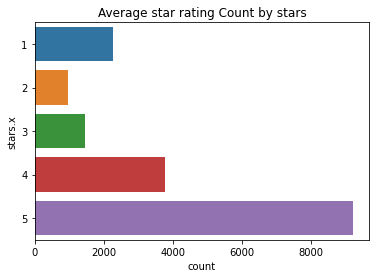

In [28]:
sns.countplot(y="stars.x", data=fitness_df)
plt.title("Average star rating Count by stars")

In [29]:
# Top ten fitness centre
a= fitness_df['name'].unique()
print('Total no. of fitness centres',len(a))
fitness_df['name'].value_counts()[:10]

Total no. of fitness centres 1242


Carowinds                        481
US National Whitewater Center    429
Planet Fitness                   372
Progressive Field                311
LA Fitness                       261
Cleveland Metroparks Zoo         236
Gold's Gym                       189
Greater Cleveland Aquarium       186
Exit Strategy                    179
Freedom Park                     171
Name: name, dtype: int64

In [30]:
useful_reviews= len(fitness_df[fitness_df['useful']>0])
cool_reviews= len(fitness_df[fitness_df['cool']>0])
funny_reviews= len(fitness_df[fitness_df['funny']>0])
negative_reviews=len(fitness_df[fitness_df['stars.x']<=2])
positive_reviews=len(fitness_df[fitness_df['stars.x']>=3])
total_reviews=len(fitness_df)

In [31]:
useful_reviews= len(ml_real_estate[ml_real_estate['useful']>0])
cool_reviews= len(ml_real_estate[ml_real_estate['cool']>0])
funny_reviews= len(ml_real_estate[ml_real_estate['funny']>0])
negative_reviews=len(ml_real_estate[ml_real_estate['stars.x']<=2])
positive_reviews=len(ml_real_estate[ml_real_estate['stars.x']>=3])
total_reviews=len(ml_real_estate)

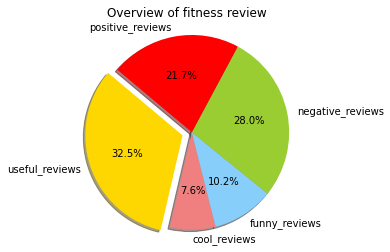

In [32]:
# overview of reviews as a pie chart
import matplotlib.pyplot as pltx
labels= 'useful_reviews','cool_reviews','funny_reviews','negative_reviews','positive_reviews'
sizes= [useful_reviews,cool_reviews,funny_reviews,negative_reviews,positive_reviews]
colors=['gold','lightcoral','lightskyblue','yellowgreen','red']
explode=(0.1,0,0,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct= '%1.1f%%',shadow=True,startangle=140)
        
plt.axis('equal')
plt.title("Overview of fitness review")
plt.show()

In [33]:
# rslt_df = fitness_df[fitness_df['year'] == 2005]
# rslt_df_next_year = fitness_df[fitness_df['year'] == 2007]
# hmap = {}
# for index, row in rslt_df.iterrows():
#     hmap[row['business_id']] = row['is_open']
# rslt_closed = pd.DataFrame(columns=['business_id', 'stars.x', 'review_count'])
# for index, row in rslt_df_next_year.iterrows():
#     if row['is_open'] == 0 and hmap[row['business_id']] == 1:
#         rslt_closed.append({"business_id": row['business_id'], 'stars.x': row['stars.x'], 'review_count': row['review_count']}, ignore_index = True)
# rslt_closed.head()


In [34]:
df.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,attributes.RestaurantsCounterService,attributes.Open24Hours,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,Sectors
0,1,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,...,NaN,NaN,10:0-18:0,11:0-20:0,10:0-18:0,11:0-20:0,11:0-20:0,11:0-20:0,13:0-18:0,Fitness
1,2,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fitness
2,3,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pet care
3,4,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,...,NaN,NaN,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,NaN,NaN,Utilities services
4,5,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726649,4.5,...,NaN,NaN,0:0-0:0,9:0-16:0,9:0-16:0,9:0-16:0,9:0-16:0,NaN,NaN,Utilities services


In [35]:
gaga= df[['business_id','name','stars','Sectors','is_open','review_count','latitude','longitude']]
gaga.head()


,business_id,name,stars,Sectors,is_open,review_count,latitude,longitude
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,3.5,Fitness,1,36,35.462724,-80.852612
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD",5.0,Fitness,1,4,33.569404,-111.890264
2,XNoUzKckATkOD1hP6vghZg,Felinus,5.0,Pet care,1,5,45.479984,-73.580070
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,2.5,Utilities services,0,3,36.219728,-115.127725
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4.5,Utilities services,1,26,33.428065,-111.726649


In [36]:
gaga_1 = gaga[gaga['Sectors']=='Fitness'].reset_index(drop=True)
gaga_1.head()
gaga_1.shape

(8756, 8)

In [37]:
gaga_kk = gaga_1[gaga_1['is_open']==0].reset_index(drop=True)
gaga_kkk = gaga_1[gaga_1['is_open']==1].reset_index(drop=True)
gaga_1.head()
gaga_1.shape

(8756, 8)

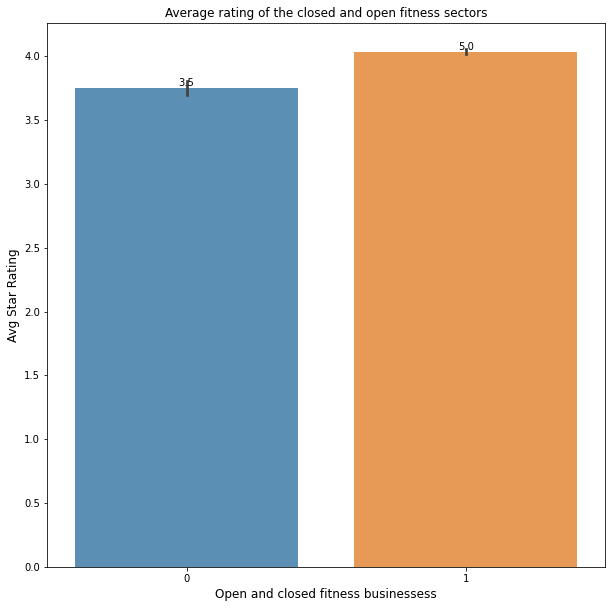

In [38]:
x=gaga_1['is_open']
#x=x.sort_index()
y = gaga_1['stars']
#plot
plt.figure(figsize=(10,10))
ax= sns.barplot(x, y, alpha=0.8)
plt.title("Average rating of the closed and open fitness sectors")
plt.ylabel('Avg Star Rating', fontsize=12)
plt.xlabel('Open and closed fitness businessess', fontsize=12)
#adding the text labels
rects = ax.patches
labels = gaga_1['stars']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')

plt.show()

# Hypothesis: Low Rating is the reason behind businessess to close.

In [39]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [40]:
cols=['latitude','longitude','stars','review_count']

In [41]:
x=gaga_1[cols]
y=gaga_1['is_open']

In [42]:
#splitting dataset into training and testing dataset. 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.29,random_state=50)

In [43]:
#SMOTE sampling 
sm=SMOTE(random_state=42)

In [44]:
#fit the training set
x_res,y_res=sm.fit_resample(train_x,train_y)

In [45]:
#make all of these as dataset
x_res=pd.DataFrame(x_res)
y_res=pd.DataFrame(y_res)
train_x=pd.DataFrame(train_x)
test_y=pd.DataFrame(test_y)

In [46]:
L=[0.0001,0.001,0.01,0.1,1,10] #
accuracy={}

for i in L:
    LR=LogisticRegression(C=i, class_weight= 'balanced')
    LR.fit(x_res,y_res)
    pred_y=LR.predict(test_x)
    accuracy[i]=100*accuracy_score(test_y,pred_y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [47]:
accuracy #different accuracy for differnent c values

{0.0001: 57.83464566929134,
 0.001: 58.58267716535433,
 0.01: 63.34645669291339,
 0.1: 63.03149606299212,
 1: 63.07086614173228,
 10: 63.07086614173228}

In [48]:
#checking precision_recall f1 score 
print (classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.21      0.54      0.30       377
           1       0.89      0.65      0.75      2163

    accuracy                           0.63      2540
   macro avg       0.55      0.59      0.53      2540
weighted avg       0.79      0.63      0.68      2540



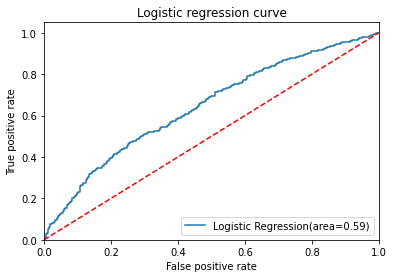

In [49]:
#ROC AND AUC (Area under curve)
logit_roc_auc=roc_auc_score(test_y,LR.predict(test_x))
fpr,tpr,thresholds=roc_curve(test_y, LR.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic regression curve')
plt.legend(loc='lower right')
plt.savefig('log_roc')
plt.show()

Text(0, 0.5, 'Accuracy')

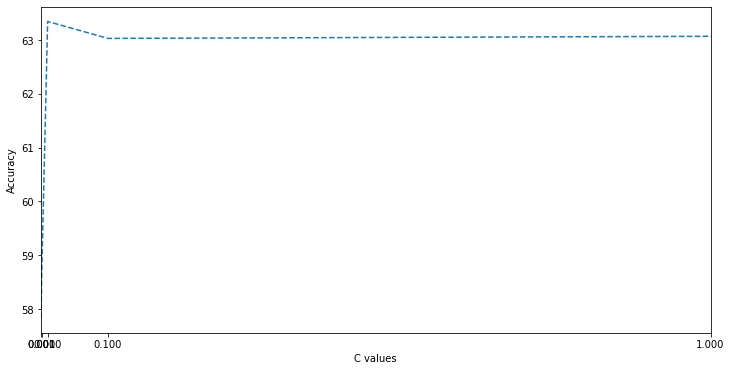

In [50]:
#c values vs accuracy curve 
plt.figure(figsize=(12,6))
plt.plot(list(accuracy.keys()),list(accuracy.values()),'--')
plt.xticks(list(accuracy.keys()))
plt.xlim(0,1)
plt.xlabel('C values')
plt.ylabel('Accuracy')

In [401]:
cf=confusion_matrix(test_y,pred_y)

Text(0.5, 257.44, 'Predicted label')

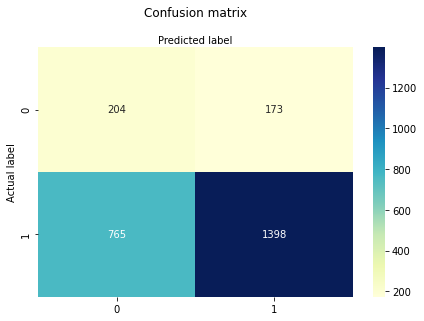

In [402]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [403]:
accuracy_score(test_y,pred_y)

0.6307086614173228

In [404]:
LR.coef_

array([[0.02143495, 0.01185048, 0.39759866, 0.00978156]])

I found out the contribution of each variable, so I have concluded that latitude and longitude (location of the business) does not affect the businesses to be open or close, but the average star ratings greatly affect the businesses by 40% to be open or close. And there is a very minimum effect of review count on businesses to be open or close. Thus, this proves our hypothesis 